# DOMAIN: AGRICULTURE

### Importing Libraries and Dataset

In [2]:
#Importing all the necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df_train=pd.read_csv("train_agriculture.csv")
df_train["source"]="train"
df_test=pd.read_excel("test_agriculture.xlsx")
df_test["source"]="test"
df=df_train
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


##### Data Description:
 * ID: UniqueID. 
 * Estimated_Insects_Count: Estimated insects count per square meter.
 * Crop_Type: Category of Crop(0,1). 
 * Soil_Type: Category of Soil (0,1).
 * Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using).
 * Number_Doses_Week: Number of doses per week.
 * Number_Weeks_Used: Number of weeks used. 
 * Number_Weeks_Quit: Number of weeks quit. 
 * Season: Season Category (1,2,3). 
 * Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides).

## Exploratory Data Analysis 

#### The basic details of the dataset

In [6]:
#No:of unique values in the column
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [7]:
#No:of columns in the dataset
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [8]:
#No:of rows and columns
df.shape

(88858, 11)

In [9]:
#Check for Null Values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

Insight: Number_Weeks_Used has 9000  missing data.

In [10]:
#Checking Datatypes 
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

In [11]:
#Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 7.5+ MB


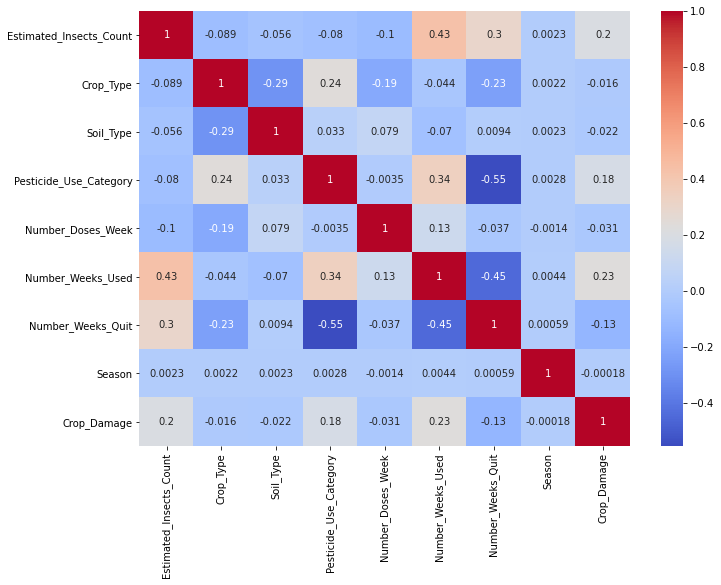

In [13]:
#Checking Correlation using heatmap
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#### Observations:
     * Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.
     * Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 
     * Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.


### Univariate Analysis


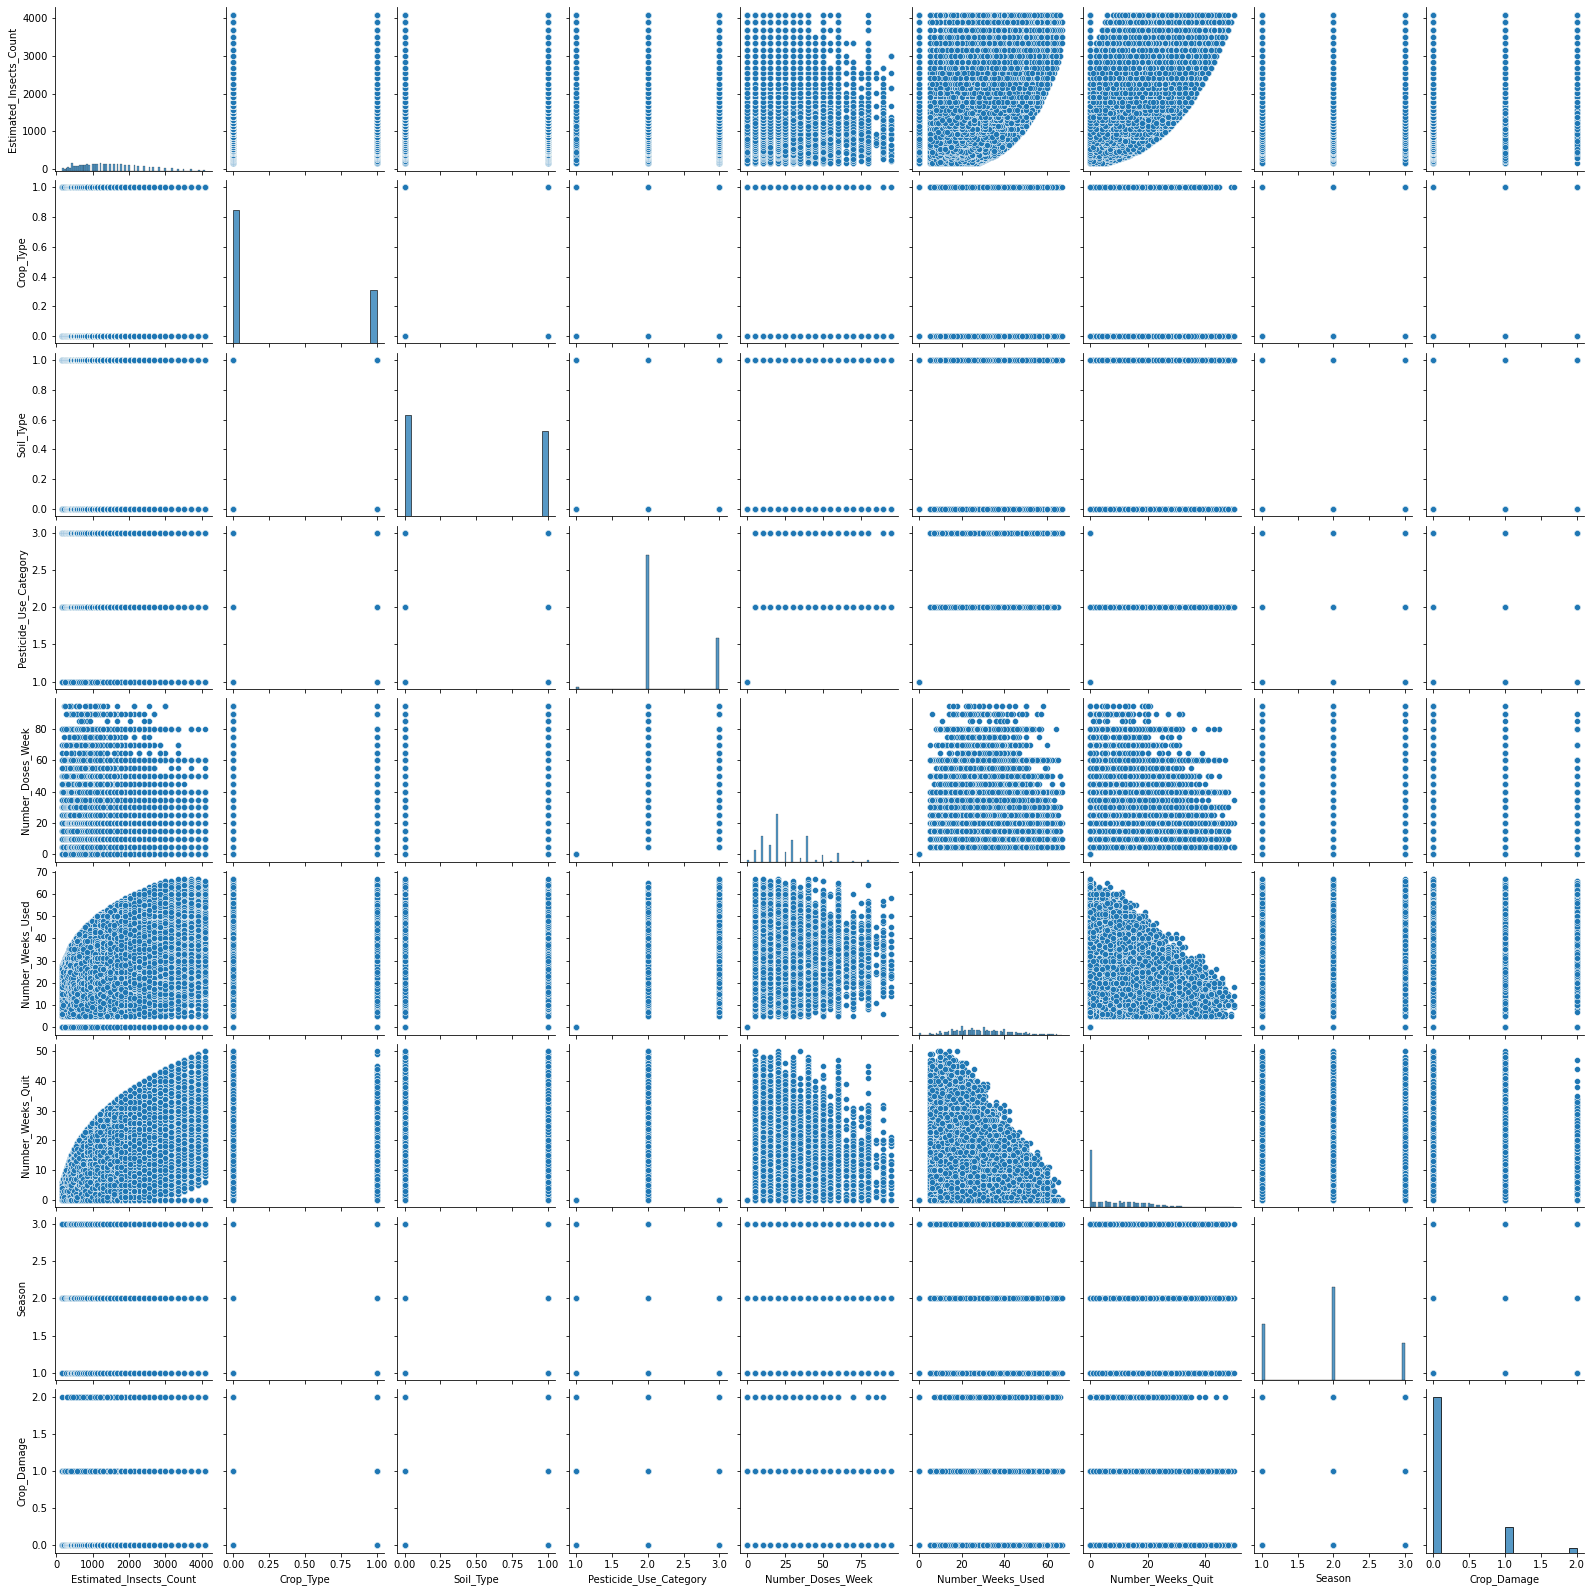

In [14]:
### Pairplot using seaborn library
sns.pairplot(df)

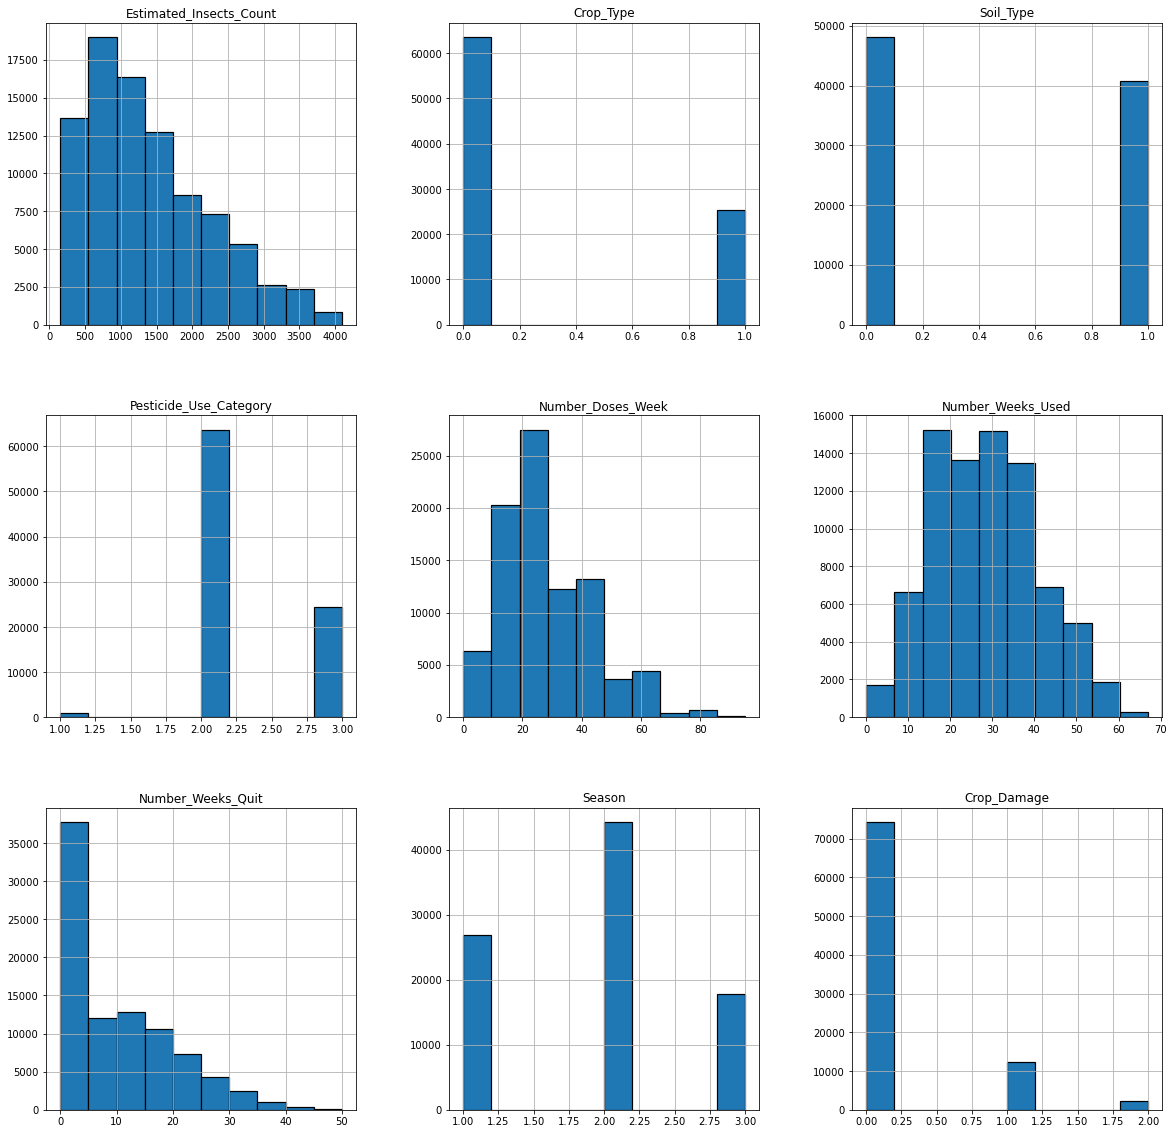

In [28]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

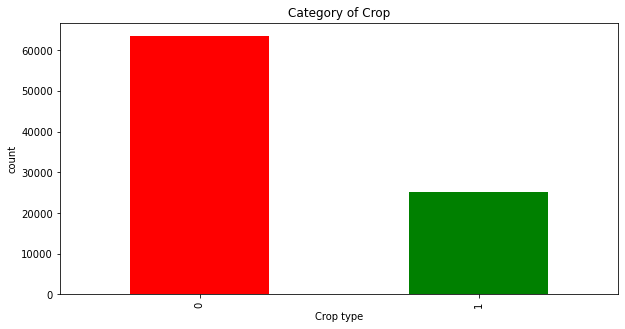

In [33]:
# visualizing the different category of crop in the dataset
plt.subplots(figsize=(10,5))
df['Crop_Type'].value_counts(normalize = True)
df['Crop_Type'].value_counts(dropna = False).plot.bar(color=[ 'red','green'])
plt.xlabel('Crop type')
plt.ylabel('count')
plt.title('Category of Crop')
plt.show()

Insight: Crop type 0 has the highest count.

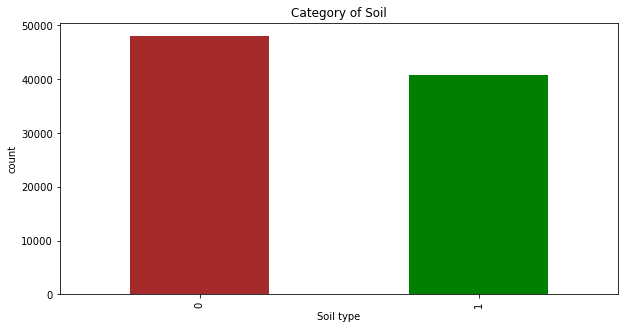

In [32]:
# visualizing the different category of soils in the dataset
plt.subplots(figsize=(10,5))
df['Soil_Type'].value_counts(normalize = True)
df['Soil_Type'].value_counts(dropna = False).plot.bar(color=[ 'brown','green'])
plt.xlabel('Soil type')
plt.ylabel('count')
plt.title('Category of Soil')
plt.show()

Insight:Soil type 0 has the highest count. 

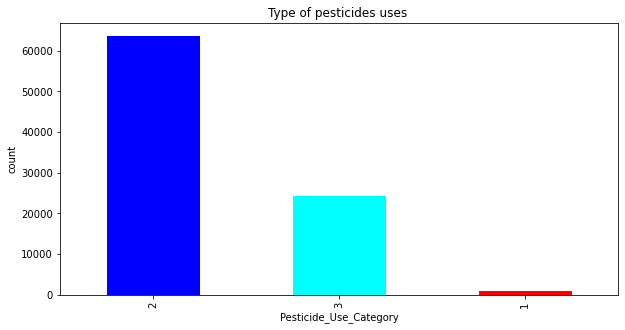

In [35]:
# visualizing the Type of pesticides uses.
plt.subplots(figsize=(10,5))
df['Pesticide_Use_Category'].value_counts(normalize = True)
df['Pesticide_Use_Category'].value_counts(dropna = False).plot.bar(color=[ 'blue','cyan','red'])
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('count')
plt.title('Type of pesticides uses ')
plt.show()

Insight:  Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using),So previously used i.e, type 2 has the highest count.

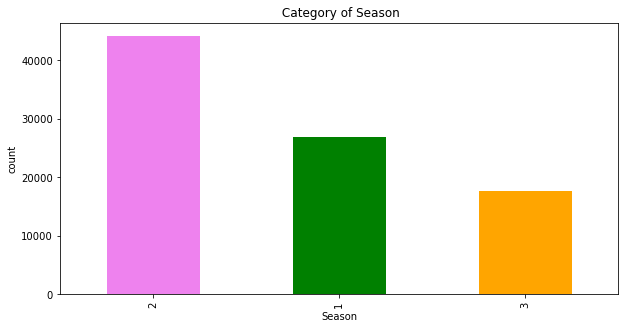

In [37]:
# visualizing the Category of Season.
plt.subplots(figsize=(10,5))
df['Season'].value_counts(normalize = True)
df['Season'].value_counts(dropna = False).plot.bar(color=[ 'violet','green','orange'])
plt.xlabel('Season')
plt.ylabel('count')
plt.title(' Category of Season')
plt.show()

Insight: Season 2 has the highest count.So it is the most favorable season for cultivation.

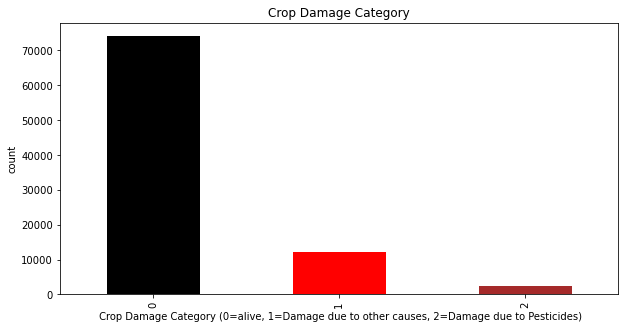

In [39]:
# visualizing the Crop Damage Category  .
plt.subplots(figsize=(10,5))
df['Crop_Damage'].value_counts(normalize = True)
df['Crop_Damage'].value_counts(dropna = False).plot.bar(color=[ 'black','red','brown'])
plt.xlabel(' Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)')
plt.ylabel('count')
plt.title('Crop Damage Category')
plt.show()

Insight: Crop damage due to pesticides has less count.

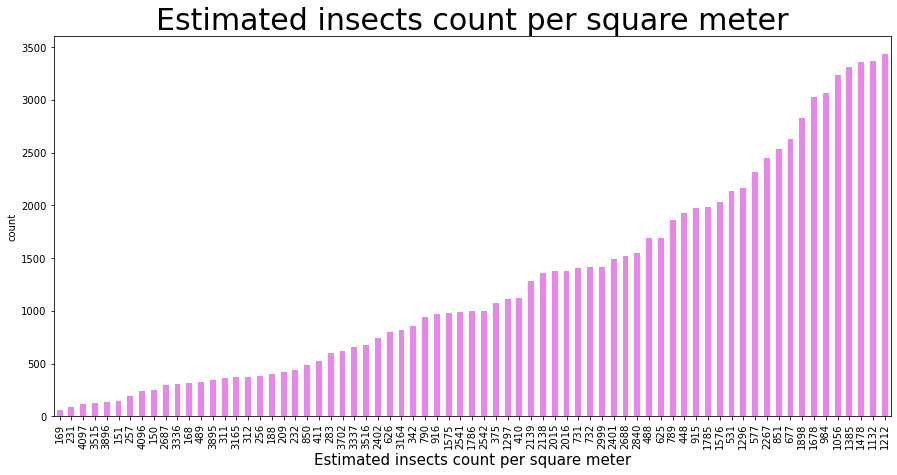

In [40]:
df['Estimated_Insects_Count'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Estimated insects count per square meter', fontsize = 30)
plt.xlabel('Estimated insects count per square meter', fontsize = 15)
plt.ylabel('count')
plt.show()

<Figure size 864x360 with 0 Axes>

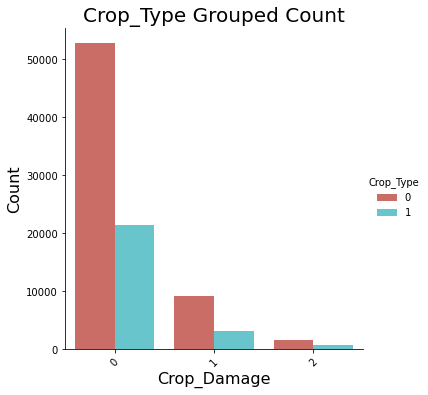

In [15]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

#### Observations:
     1. Crop damage due to pesticides are less in comparison to damage due to other causes.
     2. Crop type 0 has higher chance of survival compared to crop type 1.

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

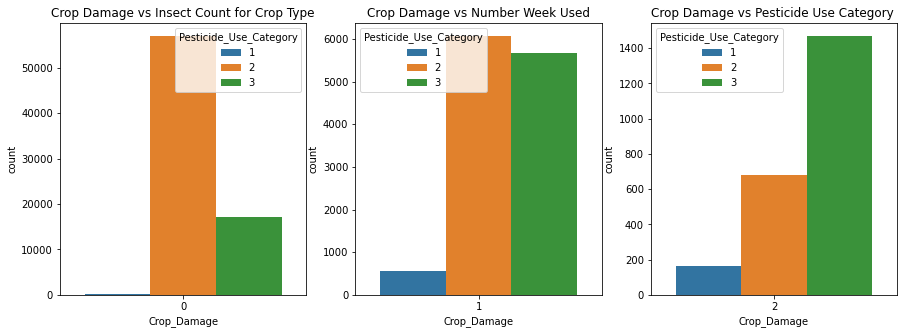

In [22]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")

#### Observations:
##### 1.Type 2 pesticide is much safer to use as compared to Type 3 pesticide.
##### 2.Type 3 pesticide shows most pesticide related damage to crops.

<Figure size 864x360 with 0 Axes>

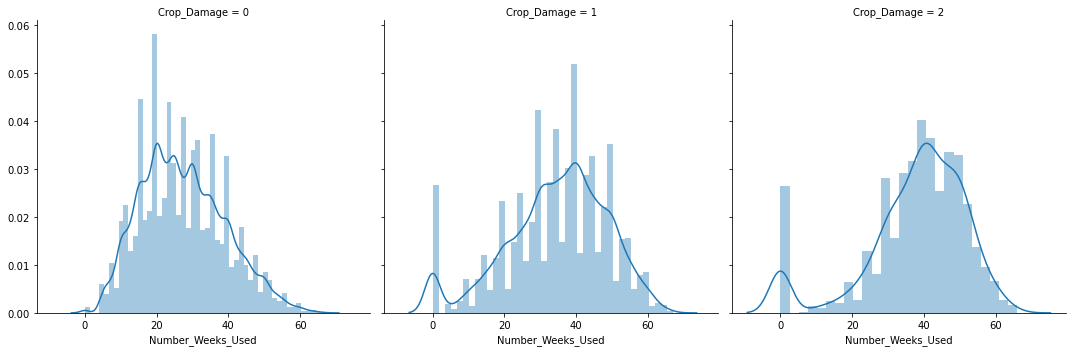

In [42]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df,col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

#### Observations:
* From Graph 1 we can conclude that till 20-25 weeks damage due to pesticide is negligible.
* From Graph 3 we can see that after 20 weeks damage due to use of pesticide increrases significantly.

### Bivariate Analysis

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

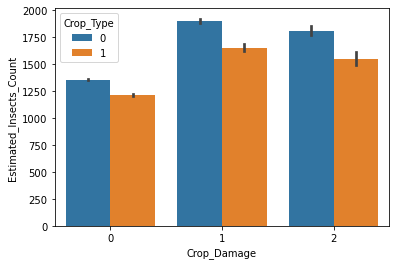

In [41]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

#### Observation:
Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

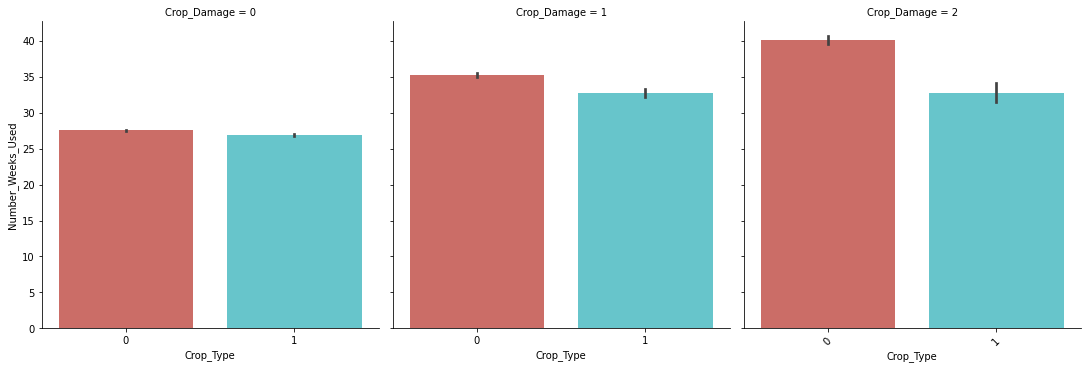

In [43]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

#### Observations:
     * Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
     * Avg. duration of pesticide related damage is lower for Crop type 1.

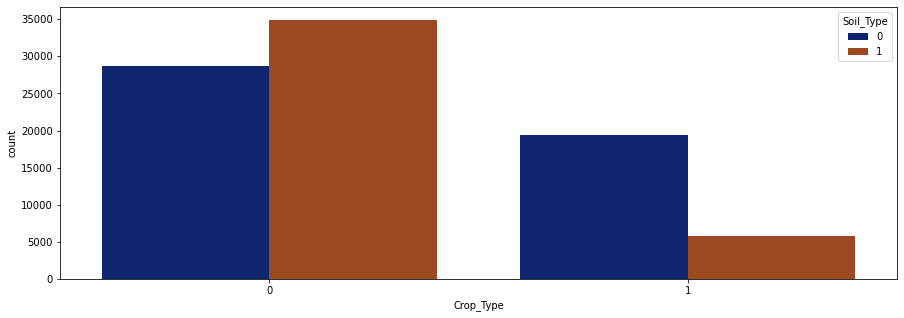

In [45]:
#comparison of crop type  based on soil type.
plt.subplots(figsize=(15,5))
sns.countplot(x ='Crop_Type', data =df, hue = 'Soil_Type', palette = 'dark')
plt.show()

#### Observations: 
* For crop category 0 1st category of soil is ideal.
* For crop category 1 soil type 0 is best.

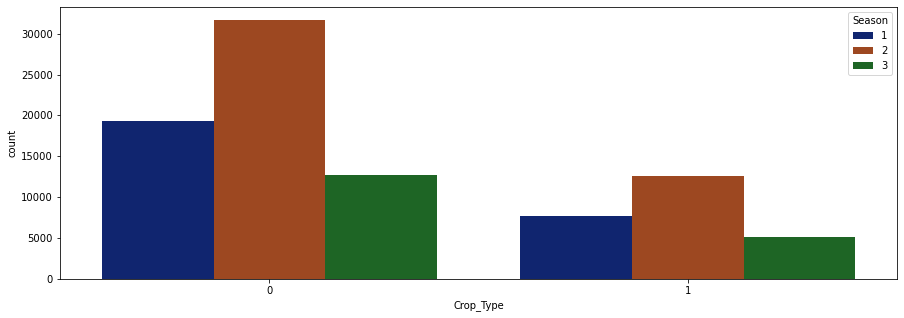

In [46]:
#comparison of crop type  based on season.
plt.subplots(figsize=(15,5))
sns.countplot(x ='Crop_Type', data =df, hue ='Season', palette = 'dark')
plt.show()

#### Observation:
* Season 2 is best for both categories of crop.

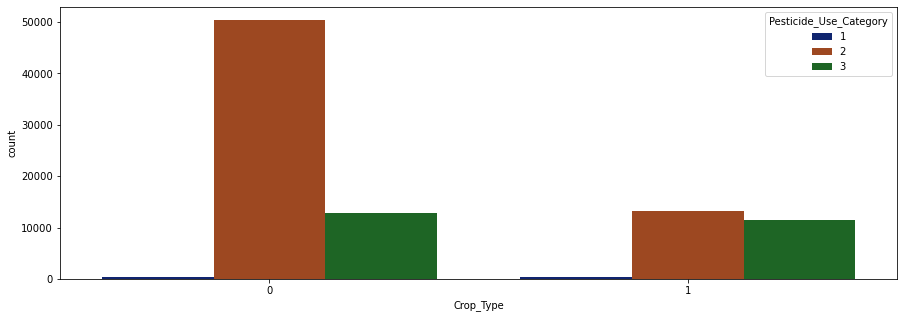

In [47]:
#comparison of crop type  based on type of pesticides uses.
plt.subplots(figsize=(15,5))
sns.countplot(x ='Crop_Type', data =df, hue ='Pesticide_Use_Category', palette = 'dark')
plt.show()

#### Observation :
Type 2 pesticides is used most  for both categories of crops.

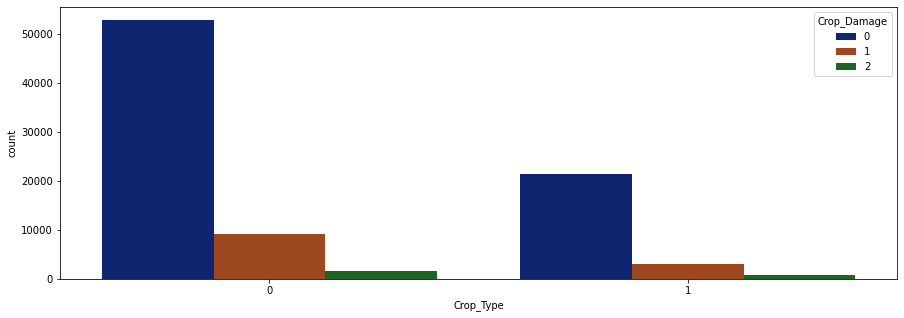

In [48]:
#comparison of crop type  based on crop Damage Category (0=alive,1=Damage due to other causes,2=Damage due to Pesticides)
plt.subplots(figsize=(15,5))
sns.countplot(x ='Crop_Type', data =df, hue ='Crop_Damage', palette = 'dark')
plt.show()

#### Observation:
It is clearly visible from the graph, both categories of crop is damaged due to other causes and pesticides is very less.